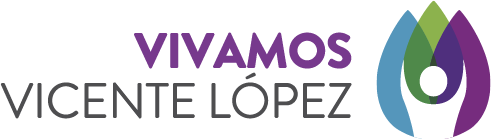

# Setup

 Se clona el repositorio, se instala dependencias y se checkea PyTorch la  GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-194-g2a19d07 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/78.2 GB disk)


# 1. Inferencia

 Ejemplo de formatos para hacer inferencia :

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

Se ejecuta el archivo detect.py , se utiliza la red yolov5s, el tamaño de la imagen es de 640, solo se mostraran valores con una confinaza mayor 0.25 y el tipo de archivo es jpg


detect: weights=['yolov5s.pt'], source=z.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-194-g2a19d07 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/yolov5/z.jpg: 384x640 2 persons, 2 ties, 11.9ms
Speed: 0.4ms pre-process, 11.9ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


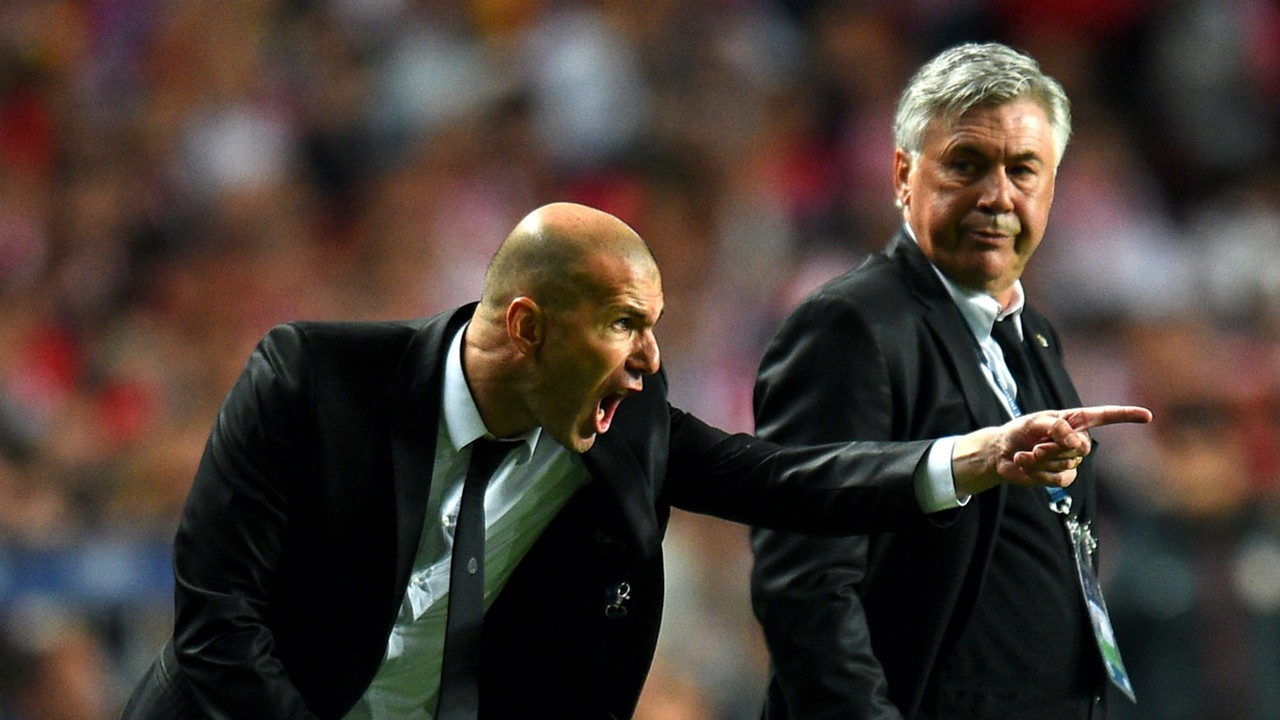

In [5]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source z.jpg
display.Image(filename='/content/yolov5/z.jpg', width=600)

# 3. Train




## Entrenar datos con Make a Sense o Roboflow 🌟 

- [Make a Sense](https://www.makesense.ai/) es gratis !! 
- [Roboflow](https://roboflow.com/?ref=ultralytics) es una pagina web donde te permite crear etiquetes para detección de objetos, tiene una versión gratuita.

- Tutorial de entrenamiento: [https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/](https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/?ref=ultralytics)
- Ejemplo de entrenamiento: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/yolov5-custom-training-tutorial/blob/main/yolov5-custom-training.ipynb)
<br>

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="480" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/6152a275ad4b4ac20cd2e21a_roboflow-annotate.gif"/></a></p>Label images lightning fast (including with model-assisted labeling)

# Entrenamiento con una base de datos propia

In [6]:
# Se conecta al drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 celda para descomprimir el Zip donde esta la base de datos , la misma tiene que estar subida al drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!unzip -q "/content/drive/MyDrive/Colab Notebooks/Trampa Barcelo/fotos.zip" -d ../

In [16]:
# Train YOLOv5s on COCO128 for 140 epochs
!python train.py --img 640 --batch 40 --epochs 320 --data customcoco128drive.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=customcoco128drive.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=320, batch_size=40, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-194-g2a19d07 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7,

- Fijarse el resultado en Results saved --> ahi esta la Ubicación de la carpeta donde ve el resultado
- ../nombre.jpg el archivo a analizar si se sube a la memoria del colab

In [ ]:
!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.043 --source ../b.jpg 
#display.Image(filename='runs/detect/exp/z.jpg', width=600)

detect: weights=['runs/train/exp2/weights/last.pt'], source=../b.jpg, imgsz=[640, 640], conf_thres=0.043, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-137-g2c63175 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/b.jpg: 640x640 2 Aedess, Done. (0.033s)
Speed: 0.7ms pre-process, 33.4ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp20


# Status

![CI CPU testing](https://github.com/ultralytics/yolov5/workflows/CI%20CPU%20testing/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on MacOS, Windows, and Ubuntu every 24 hours and on every commit.
